In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("titanic_train.csv")

In [3]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


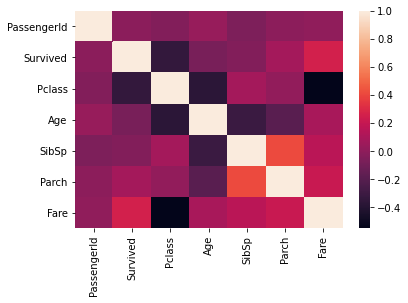

In [4]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
new_data = dataset[['Survived','Pclass', 'Sex', 'Age','SibSp']]

In [8]:
new_data

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0
...,...,...,...,...,...
886,0,2,male,27.0,0
887,1,1,female,19.0,0
888,0,3,female,NaN,1
889,1,1,male,26.0,0


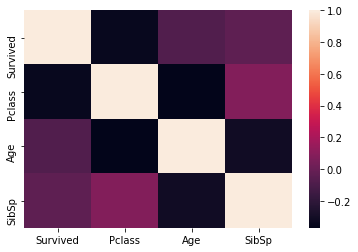

In [9]:
import seaborn as sns
sns.heatmap(new_data.corr())

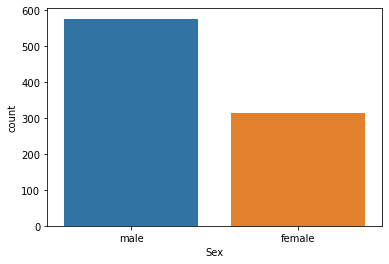

In [10]:
sns.countplot(new_data['Sex'],data=new_data)

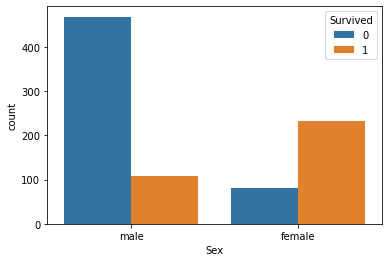

In [11]:
sns.countplot(new_data['Sex'], hue=new_data['Survived'], data=new_data)

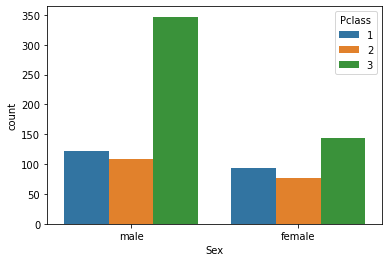

In [12]:
sns.countplot(new_data['Sex'], hue=new_data['Pclass'], data=new_data)

In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


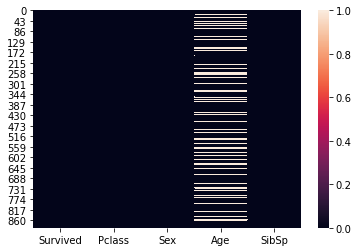

In [14]:
sns.heatmap(new_data.isnull())

In [15]:
new_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
dtype: int64

In [16]:
cleared_data = new_data.isnull()

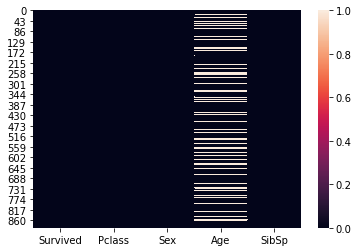

In [17]:
sns.heatmap(cleared_data)

In [18]:
new_data.fillna(new_data.mean(), inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
new_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
dtype: int64

In [20]:
Pclass=pd.get_dummies(new_data['Pclass'], drop_first='True')
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [21]:
Sex= pd.get_dummies(new_data['Sex'], drop_first='True')
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [22]:
SibSp=pd.get_dummies(new_data['SibSp'],drop_first='True')
SibSp

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,1,0,0,0,0,0
889,0,0,0,0,0,0


In [23]:
Concat_data = pd.concat([SibSp, Pclass, Sex, new_data[['Age','Survived']]], axis=1)
Concat_data

,1,2,3,4,5,8,2,3,male,Age,Survived
0,1,0,0,0,0,0,0,1,1,22.000000,0
1,1,0,0,0,0,0,0,0,0,38.000000,1
2,0,0,0,0,0,0,0,1,0,26.000000,1
3,1,0,0,0,0,0,0,0,0,35.000000,1
4,0,0,0,0,0,0,0,1,1,35.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,1,0,1,27.000000,0
887,0,0,0,0,0,0,0,0,0,19.000000,1
888,1,0,0,0,0,0,0,1,0,29.699118,0
889,0,0,0,0,0,0,0,0,1,26.000000,1


In [24]:
X= Concat_data.iloc[:,0:-1].values

In [25]:
y= Concat_data['Survived']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=10)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model :", accuracy_score(y_pred,y_test)*100)

Accuracy of the model : 80.97014925373134


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[152,  29],
       [ 22,  65]], dtype=int64)

In [32]:
pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

,Actual,Predicted
590,0,0
131,0,0
628,0,0
195,1,1
230,1,1
...,...,...
318,1,1
863,0,0
254,0,1
396,0,1
